# Notebook 5 - Titanic Prediction

CSI4106 Artificial Intelligence  
Fall 2020  
Prepared by Julian Templeton and Caroline Barrière

***INTRODUCTION***:

The supervised classification task tackled in this notebook is to determine whether a passenger survived or did not survive on the Titanic. This is a common introductory problem to supervised machine learning and is a challenge on a popular site called Kaggle. Kaggle contains competitions that users can compete in. These competitions typical provide a dataset to work with and a description of the problem to solve. That said, not all datasets will include the ground truth for the test set. Or, a competition may only provide a training and validation set, not the test set. This means that users will not know how their models perform on the real unseen data until the host(s) test the user's submission on the private test set, posting the results.    

This notebook will expand your knowledge from the previous notebook and will introduce the concept of dealing with class imabalance through the use of a technique called oversampling. You will also see how a dataset can have issues with its data and that not every feature should be used to train and test a model. You will also perform the training, testing, and evaluation in slightly new ways since we will be working with a different type of dataset.

Once again, this notebook uses **scikit-learn** (http://scikit-learn.org/stable/), **Matplot**, **Numpy**, and **Pandas**. However, we will also be using **imblearn** which provides robust techniques for balancing the number of instances of different classes. To install this packge, use the command ***pip install imbalanced-learn***. If this causes any issues you can also try *pip install imblearn*.

In this notebook we will use the Naive Bayes algorithm and the Logistic Regression algorithm to perform the classification for this problem. After evaluating both models, you will determine which performed better, and why. Finally, you will go through the process once more to determine whether or not a common oversampling technique will improve the results obtained.    

***HOMEWORK***:  
Go through the notebook by running each cell, one at a time.  
Look for **(TO DO)** for the tasks that you need to perform. Do not edit the code outside of the questions which you are asked to answer unless specifically asked. Once you're done, Sign the notebook (at the end of the notebook), and submit it.  

*The notebook will be marked on 30.  
Each **(TO DO)** has a number of points associated with it.*
***

**1. Exploring the dataset**    

First, we will set up the data that we will be working with. This data is included with the notebook and can be found from Kaggle, which also contains a description of the data that we will be working with (https://www.kaggle.com/c/titanic/data). It is highly recommended that you take a quick look at the Data Dictionary within the Overview section that is available by the link above. This will help you understand the data that we will be working with.     

As alluded to in the introduction, this Kaggle competition only provides annotated training data, while the testing data is unannotated. The ground truth of the the test dataset can be found online, but we will focus on only using the training dataset to create and test our model. This will provide a different type of Machine Learning experiment process for you to go through.       

There are many cases where a competition will only give a training set, so we will try to learn whether a passenger did or did not survive on the Titanic from this training data.

In [4]:
# Import the required packages for data analysis and machine learning
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

First, we will load the training dataset (*train.csv*) into a dataframe with Pandas and explore the first ten samples. Notice that this dataset contains a variety of potential features, unlike the movie reviews that we worked with last notebook which contained movie reviews that we had to transform. This dataset contains both continuous and discrete values.

In [5]:
# Read the dataset, show top ten rows
X = pd.read_csv("train.csv")
X.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


From the above, we can see a variety of columns. Out of these columns, the ***Survived*** column represents the class values that we wish to predict. A passenger survived from the Titanic if *Survived* is 1 and did not survive from the Titanic if *Survived* is 0. These are our two classes that we will predict (1 and 0). The other columns represent potential features that can be used by the Machine Learning algorithms to learn how to accurately predict the target class.   

One important note from the data above is that not every sample contains data for each column. For example, Passenger 6 (Moran, Mr. James) does not contain a value for their *Age* and does not contain the *Cabin* that they were residing in. Since Machine Learning algorithms learn from data, a Data Scientist will need to learn how to accurately fill in the missing data. Robust methods of doing this is beyond the scope of this notebook, but we will be filling in most of the missing data later on through simple means.    

Another note is that it is important to consider whether one class is seen more frequently than another class within the data. A class with the most instances is called the *majority* class and a class with least instances is called the *minority* class. If one class contains more instances than another class, the algorithm may focus on learning that majority class more than the minority class. In problems such as cancer diagnosis, this is a major problem (since many more people do not have cancer). Thus, another issue that we will explore in this notebook is the concept of using oversampling  to balance the class distribution. This concept will be explained in detail later in the notebook.  

Below is a plot of the number of instances for each class. In this scenario, based on the data available from the training set, more people did not survive on the Titanic than those who did survive (as we would expect in this scenario). Since we cannot simply collect more data on passenger's who survived the Titanic, we will need to think of ways to balance the class distribution.

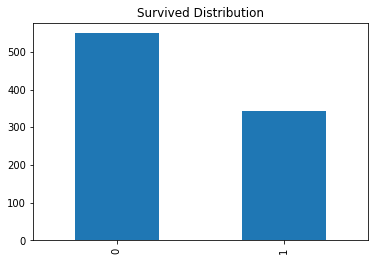

In [6]:
plt.figure() # Creates a new figure
X["Survived"].value_counts().plot(kind="bar", title="Survived Distribution")
plt.show()

With this in mind, we will now move the class values from the pandas dataframe X into a numpy array called y. X is typically used to refer to the features and y is typically used to represent the class values.

In [7]:
# This can ONLY BE DONE ONCE, as we pop the values into a new variable to be used as predicted class
y = X.pop("Survived").values

Since we have taken a look into the class distribution, we will now take a look into the other attributes available in the dataset. Below we print a list of all available attributes and explore the properties of the *Embarked* column.

In [8]:
# Show all attributes
print(list(X))
# Examples of data exploration
print(X.shape)
print(X['Embarked'].value_counts())

['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
(891, 11)
S    644
C    168
Q     77
Name: Embarked, dtype: int64


From the above notice, it can be seen that the *Embarked* attribute contains 644 *S* values, 168 *C* values, and 77 *Q* values. But this is actually two less than the total of 891 instances. Thus, there are two missing values within this attribute. This is shown via the code below:

In [9]:
# Find the rows with a null Embarked value
X[X['Embarked'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


**(TO DO) Q1 - 2 marks**   
Based on the above example, explore the *Age* and the *Cabin* attributes. Print which values they contain and the rows where they are missing values. Note that some values may not be explicitly shown when called (represented by ...), so as long as the first few and last few rows appear that is fine.

In [73]:
# TODO Q1: For the Age attribute
print(list(X))
print(X.shape)
print(X['Age'].value_counts())
X[X['Age'].isnull()]

['Pclass', 'Sex_female', 'Sex_male', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
(891, 10)
29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
55.500000      1
53.000000      1
20.500000      1
23.500000      1
0.420000       1
Name: Age, Length: 89, dtype: int64


,Pclass,Sex_female,Sex_male,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S


In [11]:
# TODO Q1: For the Cabin attribute
print(list(X))
print(X.shape)
print(X['Cabin'].value_counts())
X[X['Cabin'].isnull()]

['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
(891, 11)
B96 B98        4
C23 C25 C27    4
G6             4
F2             3
D              3
              ..
A10            1
A16            1
T              1
E17            1
D6             1
Name: Cabin, Length: 147, dtype: int64


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
884,885,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


**2. Cleaning the data**    

Having explored the dataset, we will now work on cleaning some of the missing values from attributes that we will be using as features for the Machine Learning algorithms.   

Specifically, we will fill in the missing values for the *Age* and *Embarked* attributes. Although it is also possible to do this for the *Cabin* attribute, this attribute requires additional care when filling in its missing values. Thus, this notebook will not be exploring the *Cabin* attribute despite its importance (since the location of the passenger is an important identifier as to whether they survived or did not survive).   

When determining how to fill in the missing values, we will be considering the mean value of the attribute itself or of other attributes to fill in the missing values. However, more robust methods can be used. For your own interest, the following article does a good job discussing some of the available methods: https://towardsdatascience.com/how-to-handle-missing-data-8646b18db0d4. Note that the term *imputation* refers to the process of filling in missing values.

For the *Age* attribute, we will fill in the missing values with a trivial method. The missing values will be filled with the mean age of passengers that contain a non-null age value. Although this will likely cause issues, such as making the algorithm learn inaccurate patterns from the mean age values, this is one of many trival approaches to filling in the missing data.

In [12]:
# Update the dataframe by filling in all missing age values as the mean of existing age values.
X["Age"].fillna(X["Age"].mean(), inplace=True)

For the *Embarked* attribute, we will do a little more investigation as to what the values should be. Since there are only two missing values and there are three available options for those values, we will manually select which value to assign to the rows missing the values. Below we view the means for all of the numerical attributes of the dataset, for each of the three possible *Embarked* values.

In [13]:
# Isolate the rows for each possible value of Embarked (S, C, Q)
# Get the mean values when equal to S
df_embarked_S = X.loc[X["Embarked"] == 'S']
print("When Embarked equals S:")
print(df_embarked_S.describe().loc[['mean']])
# Get the mean values when equal to C
df_embarked_C = X.loc[X["Embarked"] == 'C']
print("\nWhen Embarked equals C:")
print(df_embarked_C.describe().loc[['mean']])
# Get the mean values when equal to Q
df_embarked_Q = X.loc[X["Embarked"] == 'Q']
print("\nWhen Embarked equals Q:")
print(df_embarked_Q.describe().loc[['mean']])

When Embarked equals S:
      PassengerId    Pclass        Age     SibSp     Parch       Fare
mean    449.52795  2.350932  29.480855  0.571429  0.413043  27.079812

When Embarked equals C:
      PassengerId    Pclass        Age     SibSp     Parch       Fare
mean   445.357143  1.886905  30.562419  0.386905  0.363095  59.954144

When Embarked equals Q:
      PassengerId    Pclass        Age     SibSp     Parch      Fare
mean   417.896104  2.909091  29.113724  0.428571  0.168831  13.27603


Now, let us take one more look at the rows with missing *Embarked* values.

In [14]:
# Look at the rows with missing Embarked values again
X[X['Embarked'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Given that the two above rows contain mostly similar data, it is safe to say that they will be assigned the same *Embarked* values. When comparing the values in these rows to the mean values seen above, it can be seen that when *Embarked* equals C, the means of all attributes (except the PassengerId, which is meaningless) are closest to the attribute values found from both of these rows. Therefore we will assign the value C to the *Embarked* attribute of the above two rows.

In [15]:
# Replace all NaN values for the Embarked column with the value 'C'
X["Embarked"].fillna('C', inplace=True)

**(TO DO) Q2 - 2 marks**   
Imagine that we want to fill the missing values for the *Age* and *Embarked* attributes via another method. Propose one unique method to fill the missing values (can be trivial or complex) for the *Age* attribute and another unique method to fill the missing values for the *Embarked* attribute. Answer in the cell below.

TODO: Q2       
Computing the overall mean, median or mode is a very basic imputation method. It is very fast, but has clear disadvantages. One disadvantage is that mean imputation reduces variance in the dataset. Besides, interpolation and extrapolation are also good methods to fill in missing data.

In [16]:
# The missing values of "Age" will be filled with the median age of passengers that contain a non-null age value
X["Age"].fillna(X["Age"].median(), inplace=True)

In [17]:
# The missing values of "Embarked" will be filled with the median of the value C to the Embarked attribute of the two rows that
#had  a null Embarked value
X["Embarked"].fillna(df_embarked_C.median(), inplace=True)

Before selecting which features to use, we will convert the categorical data within the *Sex* and *Embarked* columns to be numerical. This will be done via One-Hot-Encoding, where each possible categorical value for an attribute is made to be its own attribute. Then, only one of these three attributes will contain the value 1 for a row, where the others contain 0. In the next notebook we will explore the OneHotEncoder provided by sklearn, but we will handle this manually with pandas for this notebook (via the *get_dummies* function).

In [18]:
X.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
# Convert the categorical values stored within the Sex column to be numerical via One-Hot-Encoding
X = pd.concat([X, pd.get_dummies(X['Sex'], prefix='Sex')], axis=1)
# Drop the original column
X.drop(['Sex'], axis=1, inplace=True)
# Convert the categorical values stored within the Embarked column to be numerical via One-Hot-Encoding
X = pd.concat([X, pd.get_dummies(X['Embarked'], prefix='Embarked')], axis=1)
# Drop the original column
X.drop(['Embarked'], axis=1, inplace=True)

Let us take a final look at the first 5 entries in our dataset. Look at how the columns differ from the output above.

In [20]:
X.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0
2,3,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,0,1
4,5,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,0,0,1


**3. Feature selection and defining the train and validation sets**    

With the data ready to be used, we will now select the features that we will be working with and define the training and validation sets from the available data. For our feature selection we will simply be selecting all non-null attributes except for the *PassengerId*, *Ticket* and *Name*.   

The PassengerId is a unique number for each passenger and therefore cannot provide any useful patterns regarding the target class values. The names are also unlikely to provide any insight as to whether a passenger did or did not survive.    

Although we can modify the *Name* attribute to be a numerical value based on the numebr of letters in the name (perhaps names with more alphabet letters had a higher survival rate), we will not do this since it is an illogical line of thought for this problem.     

Ticket is a value that does not seem to provide any useful information either. Therefore we will not use it.

Let us look at the remaining attributes with null values after our data cleaning to see what will else will not be selected as a feature.

In [21]:
# Look at what is null
X.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Sex_female       0
Sex_male         0
Embarked_C       0
Embarked_Q       0
Embarked_S       0
dtype: int64

As we can see, all attribtues except for *Cabin* contain no missing values. Although *Cabin* is important, we will exclude it since we did not properly clean it and majority of the data is missing a value. Although we can skip any rows that do not contain a *Cabin* value or can assign an 'unknown' value to missing values, there are too many missing values for this to be reasonable.    

For the rest of the attributes, although we may benefit from combining some similar attributes (such as Parch and SibSp), we will use them as is since they are characteristics that can provide insight into whether a passenger did or did not survive.       

For example, perhaps more females survived than males or perhaps younger passengers survived more frequently than older passengers.

In [22]:
# Define the list of attributes to use as features for the algorithms.
featureSet = ['Pclass', 'Sex_female', 'Sex_male', 'Age', 'SibSp', 
              'Parch', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S']

In [23]:
# Set the dataframe to only contain the desired variables
X = X[featureSet].copy()

With the features selected, we will now split the data into a training and validation set from the available data. Since we do not have the explicit testing set's class values (but do have a testing set), the test set produced by scikit-learn will be used to validate whether the learning appears to be successful. This is considered the validation set despite the name from sklearn's function call.

In [24]:
# split the large dataset into train and test
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state=2)
# Look at the shape of the outputs
print(X_train.shape)
print(y_val.shape)

(712, 10)
(179,)


In [25]:
# Look at the training set
X_train.head()

,Pclass,Sex_female,Sex_male,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
30,1,0,1,40.0,0,0,27.7208,1,0,0
10,3,1,0,4.0,1,1,16.7000,0,0,1
873,3,0,1,47.0,0,0,9.0000,0,0,1
182,3,0,1,9.0,4,2,31.3875,0,0,1
876,3,0,1,20.0,0,0,9.8458,0,0,1


In [26]:
# Look at the validation set
X_val.head()

,Pclass,Sex_female,Sex_male,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
707,1,0,1,42.0,0,0,26.2875,0,0,1
37,3,0,1,21.0,0,0,8.0500,0,0,1
615,2,1,0,24.0,1,2,65.0000,0,0,1
169,3,0,1,28.0,0,0,56.4958,0,0,1
68,3,1,0,17.0,4,2,7.9250,0,0,1


**4. Evaluation techniques**    

Later on we will be using more evaluation techniques to better evaluate the performance of the models. For now, we will define functions to calculate the *Precision*, *Recall*, and *Accuracy* metrics. All of these were discussed in the previous notebook.    

The *Accuracy* represents what percentage of classifications the model correctly made. 

In [27]:
def precision(actualTags, predictions, classOfInterest):
    '''
    Calculates the precision for a specific class, given the ground truth and predicted values.
    '''
    totalFound = 0
    for i in range(len(actualTags)):
        if (actualTags[i] == classOfInterest and actualTags[i] == predictions[i]):
            totalFound += 1
    return totalFound / np.count_nonzero(predictions == classOfInterest)

In [28]:
def recall(actualTags, predictions, classOfInterest):
    '''
    Calculates the recall for a specific class, given the ground truth and predicted values.
    '''
    totalFound = 0
    for i in range(len(actualTags)):
        if (actualTags[i] == classOfInterest and actualTags[i] == predictions[i]):
            totalFound += 1
    return totalFound / np.count_nonzero(actualTags == classOfInterest)

In [29]:
def accuracy(actualTags, predictions):
    '''
    Calculates the average number of correct predictions.
        - actualTags: The ground truth
        - predictions: What the model predicts
    '''
    totalFound = 0
    for i in range(len(actualTags)):
        if (actualTags[i] == predictions[i]):
            totalFound += 1
    return totalFound / len(predictions)

In [30]:
# Example of calculating accuracy
accuracy([0, 1, 1, 1, 0], [1, 1, 1, 0, 1])

0.4

**5. Naive Bayes**    

With the data preprocessed and several evaluation functions defined, we are now ready to use some Machine Learning algorithms to perform the predictions of whether or not a passenger survived on the Titanic.    

The first approach that we will use is the Naive Bayes algorithm provided by scikit-learn. This will be a very similar process to what you have done in notebook 4. You will train the model by calling the *fit* function and will retrieve predictions from the model by calling the *predict* function. Unlike last notebook, we already have all of our data preprocessed as numerical features within a pandas dataframe, with the class labels as numpy arrays (y_train and y_val). Thus we will not need to perform any transformations, such as those that were performed in notebook 3.  

The first task is to train the model with the .fit() function.

In [31]:
# Train the model with the training set by calling the .fit() function
# X_train contains the features used to train the model
# y_train contains the class labels for the samples from X_train
clf_nb = MultinomialNB().fit(X_train, y_train)

We can get then view how the algorithm performs when predicting the samples in the training set through the following code.

In [32]:
print("Comparing the first ten actual values to the predicted values:")
# Print the first ten class labels for the training set
print(y_train[0:10])
# Predict whether the passengers did or did not survive the Titanic on the training set
nb_train_predictions = clf_nb.predict(X_train)
# Print the first ten predictions
print(nb_train_predictions[0:10])
print("Calculating the total accuracy for the training set:")
print(accuracy(y_train, nb_train_predictions))

Comparing the first ten actual values to the predicted values:
[0 1 0 0 0 0 0 1 1 0]
[0 1 0 1 0 0 0 0 0 0]
Calculating the total accuracy for the training set:
0.6980337078651685


From the above, we can see that after being trained, the model can correctly predict just under 70% of all samples from the training set. But how well does it perform on the validation set?

**(TO DO) Q3 - 3 marks**   
Following the example provided above, obtain the predictions from the Naive Bayes model on the entire validation set (X_val, y_val) and print the precision, recall, and accuracy for the validation set (for both classes, 1 and 0).

In [46]:
# TODO

# Get the predictions for the validation set
nb_val_predictions = clf_nb.predict(X_val)
# Retrieve and print the precision values for class 1 and class 0
print("Precision when class = 0: ", precision(y_val, nb_val_predictions, 0))
print("Precision when class = 1: ", precision(y_val, nb_val_predictions, 1))
# Retrieve and print the recall values for class 1 and class 0
print("Recall when class = 0: ", recall(y_val, nb_val_predictions, 0))
print("Recall when class = 1: ", recall(y_val, nb_val_predictions, 1))
# Retrieve and print the accuracy for the model
print("Accuracy: ", accuracy(y_val, nb_val_predictions))

Precision when class = 0:  0.6535433070866141
Precision when class = 1:  0.6730769230769231
Recall when class = 0:  0.83
Recall when class = 1:  0.4430379746835443
Accuracy:  0.659217877094972


**6. Logistic Regression**    

With the predictions and data obtained for the Naive Bayes Machine Learning algorithm, we will try using another Machine Learning algorithm that may or may not perform better than the Naive Bayes approach. Specifically, we will use the Logistic Regression Machine Learning algorithm to predict who did and did not survive on the Titanic.    

Since the Logistic Regression algorithm that we will be using also comes from scikit-learn, the general process will be nearly identical to what we have done for the Naive Bayes classifier. The main difference is that we will now be using a different algorithm that contains some options that we will need to set. All of the details of possible ways to tune the Logistic Regression model are available [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).     

We will first initialize and train the model with the training data.

In [48]:
# Train the model with the training set by calling the .fit() function
# X_train contains the features used to train the model
# y_train contains the class labels for the samples from X_train
clf_lr = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=1).fit(X_train, y_train)

Next, we will view how the model performs on the training data to get an idea as to how the training went. Since we trained on this data, we will hopefully have strong results.

In [49]:
print("Comparing the first ten actual values to the predicted values:")
# Print the first ten class labels for the training set
print(y_train[0:10])
# Predict whether the passengers did or did not survive the Titanic on the training set
lr_train_predictions = clf_lr.predict(X_train)
# Print the first ten predictions
print(lr_train_predictions[0:10])
print("Calculating the total accuracy for the training set:")
print(accuracy(y_train, lr_train_predictions))

Comparing the first ten actual values to the predicted values:
[0 1 0 0 0 0 0 1 1 0]
[0 1 0 0 0 0 0 1 0 0]
Calculating the total accuracy for the training set:
0.8103932584269663


**(TO DO) Q4 - 3 marks**   
Following the example provided above, obtain the predictions from the Logistic Regression model on the validation set (X_val, y_val) and print the precision, recall, and accuracy for the validation set.

In [50]:
# TODO

# Get the predictions for the validation set
lr_val_predictions = clf_lr.predict(X_val)
# Retrieve and print the precision values for class 1 and class 0
print("Precision when class = 0: ", precision(y_val, lr_val_predictions, 0))
print("Precision when class = 1: ", precision(y_val, lr_val_predictions, 1))
# Retrieve and print the recall values for class 1 and class 0
print("Recall when class = 0: ", recall(y_val, lr_val_predictions, 0))
print("Recall when class = 1: ", recall(y_val, lr_val_predictions, 1))
# Retrieve and print the accuracy for the model
print("Accuracy: ", accuracy(y_val, lr_val_predictions))

Precision when class = 0:  0.7583333333333333
Precision when class = 1:  0.847457627118644
Recall when class = 0:  0.91
Recall when class = 1:  0.6329113924050633
Accuracy:  0.7877094972067039


**7. More evaluation techniques**    

Now that you have trained and tested the models above, you will define two additional evaluation methods. The first will be the Micro-average on precisions and the second will be the Macro-average on precisions. Definitions for these can be found in your course material.    

Although we can also define the Micro- and Macro-averages on recalls, we will not do that for this notebook to avoid having too many evaluation metrics to consider. In reality, each dataset will have evaluation criteria that are more and less important to evaluating the problem.

**(TO DO) Q5 - 2 marks**   
In the cell below, complete the definition of the micro_precision_average function. You must use only the parameters provided and cannot use any functionality from scikit-learn's library.

In [102]:
# TODO
def micro_precision_average(actualTags, predictions, class1, class2):
    '''
    Calculates the Micro-average on precisions. 
        - actualTags: The ground truth
        - predictions: The predicted class values
        - class1: The value of the first class
        - class2: The value of the second class
    '''
    # micro_precision_average = (TP_c1 + TP_c2)/(TP_c1 + FP_c1 + TP_c2 + FP_c2)
    class1_totalFound = 0
    class2_totalFound = 0
    for i in range(len(actualTags)):
        if (actualTags[i] == class1 and predictions[i] == class1):
            class1_totalFound += 1  #TP_c1
        elif (actualTags[i] == class2 and predictions[i] == class2):
            class2_totalFound += 1  #TP_c2
            
    class1_predictions = 0
    class2_predictions = 0
    for j in range(len(predictions)):
        if predictions[j] == class1:
            class1_predictions +=1
        else:
            class2_predictions +=1
            
    return (class1_totalFound + class2_totalFound) / (class1_predictions + class2_predictions)

**(TO DO) Q6 - 2 marks**   
In the cell below, complete the definition of the macro_precision_average function. You must use only the parameters provided and cannot use any functionality from scikit-learn's library.

In [103]:
# TODO
def macro_precision_average(actualTags, predictions, class1, class2):
    '''
    Calculates the Macro-average on precisions.
        - actualTags: The ground truth
        - predictions: The predicted class values
        - class1: The value of the first class
        - class2: The value of the second class
    '''
    PreC_c1 = precision(actualTags, predictions, class1)
    PreC_c2 = precision(actualTags, predictions, class2)
    
    return (PreC_c1 + PreC_c2) / 2

**(TO DO) Q7 - 2 marks**   
To test these evaluation functions, evaluate the Micro- and Macro-averages on the precisions from your testing on the validation set with both the Naive Bayes and Logistic Regression models. Print the results.

In [104]:
# TODO

print("For Naive Bayes:")
print("Micro Precision Average: ", micro_precision_average(y_val, nb_val_predictions, 1, 0))
print("Macro Precision Average: ", macro_precision_average(y_val, nb_val_predictions, 1, 0))

print("For Logistic Regression:")
print("Micro Precision Average: ", micro_precision_average(y_val, lr_val_predictions, 1, 0))
print("Macro Precision Average: ", macro_precision_average(y_val, lr_val_predictions, 1, 0))

For Naive Bayes:
Micro Precision Average:  0.659217877094972
Macro Precision Average:  0.6633101150817686
For Logistic Regression:
Micro Precision Average:  0.7877094972067039
Macro Precision Average:  0.8028954802259887


**8. Discussion**    

As with all Machine Learning experiments, we must use the data obtained to understand which model is better and why. In this scenario we have the precision, recall, accuracy, micro-average, and macro-average values. Below is a discussion question separated into sections for you to answer.

**(TO DO) Q8 (a) - 2 marks**   
Copy the outputs for the precision, recall, accuracy, micro-average, and macro-average obtained for both models in the table below (only from the validation tests). Each value goes into the corresponding <td\></td\> tag. For each evaluation approach, mention which Machine Learning model provides the better results.

TODO:     
<table>
    <tr>
        <td></td>
        <td><strong>Naive Bayes</strong></td>
        <td><strong>Logistic Regression</strong></td>
        <td><strong>Better Model</strong></td>
    </tr>
    <tr>
        <td><strong>Precision (class=0)</strong></td>
        <td>0.6535433070866141</td>
        <td>0.7583333333333333</td>
        <td>Logistic Regression</td>
    </tr>
    <tr>
        <td><strong>Precision (class=1)</strong></td>
        <td>0.6730769230769231</td>
        <td>0.847457627118644</td>
        <td>Logistic Regression</td>
    </tr>
    <tr>
        <td><strong>Recall (class=0)</strong></td>
        <td>0.83</td>
        <td>0.91</td>
        <td>Logistic Regression</td>
    </tr>
    <tr>
        <td><strong>Recall (class=1)</strong></td>
        <td>0.4430379746835443</td>
        <td>0.6329113924050633</td>
        <td>Logistic Regression</td>
    </tr>
    <tr>
        <td><strong>Accuracy</strong></td>
        <td>0.659217877094972</td>
        <td>0.7877094972067039</td>
        <td>Logistic Regression</td>
    </tr>
    <tr>
        <td><strong>Micro Average Precision</strong></td>
        <td>0.659217877094972</td>
        <td>0.7877094972067039</td>
        <td>Logistic Regression</td>
    </tr>
    <tr>
        <td><strong>Macro Average Precision</strong></td>
        <td>0.6633101150817686</td>
        <td>0.8028954802259887</td>
        <td>Logistic Regression</td>
    </tr>    
</table>

**(TO DO) Q8 (b) - 2 marks**   
Based on your results, which model performs better at predicting whether a passenger does or does not survive on the Titanic? Justify your answer.     

TODO:     
Precision means the percentage of the results which are relevant. On the other hand, recall refers to the percentage of total relevant results correctly classified by the algorithm. Looking at values in the table (Q8-a), The Logistic Regrestion method demosntrated higher precision and recall values for both caless in comparison to the Naive Bayes method. 

Accuracy can be defined as the fraction of predictions that the model got right. Looking at values in the table (Q8-a), The Logistic Regrestion method demosntrated higher accuracy value in comparison to the Naive Bayes method.

Based on arguments above, the Logistic Regreshion method performs better at predicting whether a passenger does or does not survive on the Titanic.

**9. Balancing the class distribution**    

As mentioned at the beginning of the notebook, this dataset contains more passengers that did not survived on the Titanic than those who did survive. This results in a class imbalance where the majority class (0) contains more instances than the minority class (1). There are many methods of handling this problem. One method is to simply take the minority class and, through some method, produce more instances of that class. For example, a trivial method could be to randomly select a number instances and duplicate them to match the number of instances from the majority class. This concept is called *oversampling*. You can also remove instances from the majority class to balance the class distribution (called *undersampling*).    

For this notebook, oversampling will be performed via imblearn's implementation of a technique called SMOTE. Understanding SMOTE is beyond the scope of this notebook, but more information can be found [here](https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/). The important thing to understand is that the number of instances for each class value will be the same by artificially creating new instances of passengers who survived from the Titanic.

In [54]:
# Define the SMOTE instance
smote = SMOTE(random_state=0, sampling_strategy="minority")
# Retrieve the oevrsampled data
X_os, y_os = smote.fit_sample(X, y)

Note that the oversampled dataset is now defined within X_os and y_os, not X and y. We will be using these values for the remainder of the notebook. Below we now look at how many instances in our new dataset contain the class 0 and how many contain the class 1. These values are now balanced when compared to the plot shown in section 1 of this notebook. Note that X_os is now a numpy array rather than a dataframe due to this conversion. This changes nothing regarding how we use it, but changes the method of plotting the data.

In [55]:
# Print the number of instances for each class
class_names, totals = np.unique(y_os, return_counts=True)
print(str(class_names[0]) + " contains " + str(totals[0]) + " instances.")
print(str(class_names[1]) + " contains " + str(totals[1]) + " instances.")

0 contains 549 instances.
1 contains 549 instances.


With the oversampled dataset, we will now define our new train and validation sets.

In [56]:
# split the large dataset into train and test
X_train_os, X_val_os, y_train_os, y_val_os = train_test_split(X_os, y_os, test_size = 0.2, random_state=2)
# Look at the shape of the outputs
print(X_train_os.shape)
print(y_val_os.shape)

(878, 10)
(220,)


With this all defined, we will now train and test a new Naive Bayes and Logistic Regression model, evaluate the models, and determine whether the oversampling provided better results than without the oversampling.

**(TO DO) Q9 - 10 marks total**   
Repeat the Machine Learning experiment performed throughout the previous sections on the new oversampled data. Ensure that you use the appropriate names (***do not forget the _os in the names*** to avoid incorrect solutions).     

**(TO DO) Q9 (a) - 3 marks**   
Train, test, and evaluate the validation set (with all evaluation metrics) with a Naive Bayes classifier.

In [65]:
# TODO: Q9 (a)
# Train the model with the .fit() function
clf_nb_os = MultinomialNB().fit(X_train_os, y_train_os)

# Test the model with the train data
print('*** For the training set ***')
print("Comparing the first ten actual values to the predicted values:")
print(y_train_os[0:10])
nb_train_predictions_os = clf_nb_os.predict(X_train_os)
print(nb_train_predictions_os[0:10])
print("Calculating the total accuracy for the training set:")
print(accuracy(y_train_os, nb_train_predictions_os))

# Evaluate the model with the validation set
print('\n*** For the validation set ***')
nb_val_predictions_os = clf_nb_os.predict(X_val_os)
print("Precision when class = 0: ", precision(y_val_os, nb_val_predictions_os, 0))
print("Precision when class = 1: ", precision(y_val_os, nb_val_predictions_os, 1))
print("Recall when class = 0: ", recall(y_val_os, nb_val_predictions_os, 0))
print("Recall when class = 1: ", recall(y_val_os, nb_val_predictions_os, 1))
print("Accuracy: ", accuracy(y_val_os, nb_val_predictions_os))
print("Micro Precision Average: ", micro_precision_average(y_val_os, nb_val_predictions_os, 1, 0))
print("Macro Precision Average: ", macro_precision_average(y_val_os, nb_val_predictions_os, 1, 0))

*** For the training set ***
Comparing the first ten actual values to the predicted values:
[1 0 1 0 1 0 1 1 1 0]
[0 0 0 1 0 1 0 0 1 0]
Calculating the total accuracy for the training set:
0.6446469248291572

*** For the validation set ***
Precision when class = 0:  0.5874125874125874
Precision when class = 1:  0.7662337662337663
Recall when class = 0:  0.8235294117647058
Recall when class = 1:  0.5
Accuracy:  0.65
Micro Precision Average:  0.65
Macro Precision Average:  0.6768231768231768


**(TO DO) Q9 (b) - 3 marks**   
Train, test, and evaluate the validation set (with all evaluation metrics) with a Logistic Regression classifier.

In [66]:
# TODO: Q9 (b)
# Train the model with the .fit() function
clf_lr_os = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=1).fit(X_train_os, y_train_os)

# Test the model with the train data
print('*** For the training set ***')
print("Comparing the first ten actual values to the predicted values:")
print(y_train_os[0:10])
lr_train_predictions_os = clf_lr_os.predict(X_train_os)
print(lr_train_predictions_os[0:10])
print("Calculating the total accuracy for the training set:")
print(accuracy(y_train_os, lr_train_predictions_os))

# Evaluate the model with the validation set
print('\n*** For the validation set ***')
lr_val_predictions_os = clf_lr_os.predict(X_val_os)
print("Precision when class = 0: ", precision(y_val_os, lr_val_predictions_os, 0))
print("Precision when class = 1: ", precision(y_val_os, lr_val_predictions_os, 1))
print("Recall when class = 0: ", recall(y_val_os, lr_val_predictions_os, 0))
print("Recall when class = 1: ", recall(y_val_os, lr_val_predictions_os, 1))
print("Accuracy: ", accuracy(y_val_os, lr_val_predictions_os))
print("Micro Precision Average: ", micro_precision_average(y_val_os, lr_val_predictions_os, 1, 0))
print("Macro Precision Average: ", macro_precision_average(y_val_os, lr_val_predictions_os, 1, 0))

*** For the training set ***
Comparing the first ten actual values to the predicted values:
[1 0 1 0 1 0 1 1 1 0]
[0 0 0 0 1 0 1 1 1 1]
Calculating the total accuracy for the training set:
0.8189066059225513

*** For the validation set ***
Precision when class = 0:  0.8035714285714286
Precision when class = 1:  0.8888888888888888
Recall when class = 0:  0.8823529411764706
Recall when class = 1:  0.8135593220338984
Accuracy:  0.8454545454545455
Micro Precision Average:  0.8454545454545455
Macro Precision Average:  0.8462301587301587


**(TO DO) Q9 (c) - 2 marks**   
Compare the results between the above two experiments (from Q9 (a) and Q9 (b)), which model is better and why?

<table>
    <tr>
        <td></td>
        <td><strong>Naive Bayes (oversampled)</strong></td>
        <td><strong>Logistic Regression (oversampled)</strong></td>
        <td><strong>Better Model</strong></td>
    </tr>
    <tr>
        <td><strong>Precision (class=0)</strong></td>
        <td>0.5874125874125874</td>
        <td>0.8035714285714286</td>
        <td>Logistic Regression (oversampled)</td>
    </tr>
    <tr>
        <td><strong>Precision (class=1)</strong></td>
        <td>0.7662337662337663</td>
        <td>0.8888888888888888</td>
        <td>Logistic Regression (oversampled)</td>
    </tr>
    <tr>
        <td><strong>Recall (class=0)</strong></td>
        <td>0.8235294117647058</td>
        <td>0.8823529411764706</td>
        <td>Logistic Regression (oversampled)</td>
    </tr>
    <tr>
        <td><strong>Recall (class=1)</strong></td>
        <td>0.5</td>
        <td>0.8135593220338984</td>
        <td>Logistic Regression (oversampled)</td>
    </tr>
    <tr>
        <td><strong>Accuracy</strong></td>
        <td>0.65</td>
        <td>0.8454545454545455</td>
        <td>Logistic Regression (oversampled)</td>
    </tr>
    <tr>
        <td><strong>Micro Average Precision</strong></td>
        <td>0.65</td>
        <td>0.8454545454545455</td>
        <td>Logistic Regression (oversampled)</td>
    </tr>
    <tr>
        <td><strong>Macro Average Precision</strong></td>
        <td>0.6768231768231768</td>
        <td>0.8462301587301587</td>
        <td>Logistic Regression (oversampled)</td>
    </tr>    
</table>  

TODO: 
Precision means the percentage of the results which are relevant. On the other hand, recall refers to the percentage of total relevant results correctly classified by the algorithm. Looking at values in the table (Q9-c), The Logistic Regrestion (oversampled) method demosntrated higher precision and recall values for both caless in comparison to the Naive Bayes (oversampled) method. 

Accuracy can be defined as the fraction of predictions that the model got right. Looking at values in the table (Q9-c), The Logistic Regrestion (oversampled) method demosntrated higher accuracy value in comparison to the Naive Bayes (oversampled) method.

Based on arguments above, the Logistic Regreshion method performs better at predicting whether a passenger does or does not survive on the Titanic.

**(TO DO) Q9 (d) - 2 marks**   
Does the model selected from Q9 (c) perform better or worse than the model selected in Q8 (b)? Does this mean that the oversampling helps the Machine Learning learn better or worse in this scenario? Justify your answer.    

Note: There is no need to put all the data in another table (you certainly can if you would like to better organize it). Just provide the answers along with justifications as to why.

Logistic Regression                                  Logistic Regression (oversampled)                        Better Model

Precision (class=0)	    0.7583333333333333	         Precision (class=0)     0.8035714285714286         Logistic Regression(os)
Precision (class=1)  	0.847457627118644	         Precision (class=1)     0.8888888888888888         Logistic Regression(os)
Recall (class=0)	    0.91	                     Recall (class=0)	     0.8823529411764706         Logistic Regression
Recall (class=1)	    0.6329113924050633	         Recall (class=1)	     0.8135593220338984         Logistic Regression(os)
Accuracy	            0.7877094972067039	         Accuracy		         0.8454545454545455         Logistic Regression(os)
Micro Average Precision	0.7877094972067039	         Micro Average Precision 0.8454545454545455         Logistic Regression(os)
Macro Average Precision	0.8028954802259887	         Macro Average Precision 0.8462301587301587         Logistic Regression(os)

Summary: 
Based on data comparison above, it is obvious that Logistic Regression (oversampled) method has shown better performance in comparison to the Logistic Regression method. Oversampling definityl helped to reach the higher evaluation percantages.

**(TO DO) OPTIONAL - No marks**   
If you are interested, you can try out other approaches to handling the class imbalance problem via methods available with [imblearn](https://imbalanced-learn.readthedocs.io/en/stable/api.html). Then you can compare these results to see which method works best for this problem based on how we have cleaned the data and selected the features.    

You may also try working with the test data file to see what your outputs are.

***SIGNATURE:***
My name is Fatemeh Soltani.
My student number is 300139153.
I certify being the author of this assignment.